In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
# Función para dibujar un triángulo
def draw_triangle(im, triangle, color=(0, 255, 0)):
    # Normalizar coordenadas homogéneas
    triangle = np.array([v[:-1] / v[-1] for v in triangle], np.uint16)
    cv2.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv2.circle(im, tuple(v), 2, (255, 0, 255), -1)

In [8]:
# Función para escalar un triángulo
def scale(triangle, sx, sy):
    S = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    return np.dot(triangle, S.T)

In [9]:
# Función para rotar un triángulo
def rotate(triangle, angle):
    angle_rad = np.radians(angle)
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0], [np.sin(angle_rad), np.cos(angle_rad), 0], [0, 0, 1]])
    return np.dot(triangle, R.T)

In [10]:
# Función para trasladar un triángulo
def translate(triangle, dx, dy):
    T = np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    return np.dot(triangle, T.T)

In [11]:
# Función para realizar una transformación compuesta
def compuesta(triangle, dx, dy, sx, sy, angle):
    # Trasladar el triángulo al origen
    triangle = translate(triangle, -triangle[:, 0].mean(), -triangle[:, 1].mean())
    # Escalar el triángulo
    triangle = scale(triangle, sx, sy)
    # Rotar el triángulo
    triangle = rotate(triangle, angle)
    # Trasladar el triángulo de vuelta
    triangle = translate(triangle, triangle[:, 0].mean() + dx, triangle[:, 1].mean() + dy)
    return triangle

In [12]:
# Función para mostrar la imagen 
def show_im(im):
    # Convertir de BGR a RGB para que se vea correctamente en matplotlib
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

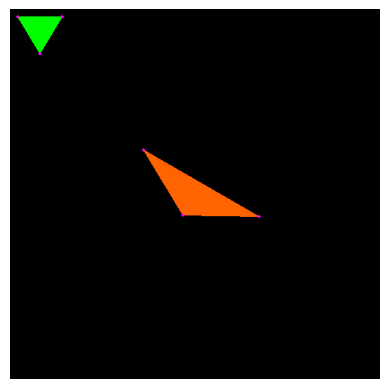

In [13]:
# Dimensiones de la imagen
w = 500
h = 500
im = np.zeros((h, w, 3), np.uint8)

# Parámetros de las transformaciones
angle = 30
s = 3
t = 250

# Sistema coordenado de imágenes
triangle1 = np.array([[10, 10, 1], [70, 10, 1], [40, 60, 1]])

# Aplicar la transformación compuesta
triangle2 = compuesta(triangle1, t, t, s, 1, angle)

# Dibujar los triángulos
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color=(0, 100, 255))

# Mostrar la imagen 
show_im(im)